In [ ]:
#QUESTION A1
import math
def summation_unit(inputs, weights):
    #Calculates the weighted sum of inputs.
    return sum(x * w for x, w in zip(inputs, weights))

def step_function(weighted_sum, threshold=0):
    #Step activation function
    if weighted_sum >= threshold:
       return 1
    else:
      return 0

def bipolar_step_function(weighted_sum, threshold=0):
    #Bipolar step activation function.
    if weighted_sum >= threshold:
      return 1
    else:
      return -1

def sigmoid_function(weighted_sum):
    #Sigmoid activation function.
    return 1 / (1 + math.exp(-weighted_sum))

def tanh_function(weighted_sum):
    #TanH activation function.
    return math.tanh(weighted_sum)

def relu_function(weighted_sum):
    #ReLU activation function.
    return max(0, weighted_sum)

def leaky_relu_function(weighted_sum, alpha=0.01):
    #Leaky ReLU activation function.
    if weighted_sum > 0 :
       return weighted_sum
    else:
       return alpha * weighted_sum
def error_calculation(predicted, actual):
    #Calculates the error between predicted and actual values
    return actual - predicted
def main():
    weights = [0.73, 0.5]
    bias = -0.7  # Bias to achieve AND gate behavior
     # AND gate
    inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
     #outputs for AND gate
    actual_outputs = [0, 0, 0, 1]

    for idx, (input1, input2) in enumerate(inputs):
        input_values = [input1, input2]
        # Summation Unit
        weighted_sum = summation_unit(input_values, weights) + bias
        print(f"Inputs: {input_values}, Weighted Sum: {weighted_sum}")

        # Activation Functions
        step_output = step_function(weighted_sum)
        print(f"Step Function Output: {step_output}")

        bipolar_step_output = bipolar_step_function(weighted_sum)
        print(f"Bipolar Step Function Output: {bipolar_step_output}")

        sigmoid_output = sigmoid_function(weighted_sum)
        print(f"Sigmoid Function Output: {sigmoid_output}")

        tanh_output = tanh_function(weighted_sum)
        print(f"TanH Function Output: {tanh_output}")

        relu_output = relu_function(weighted_sum)
        print(f"ReLU Function Output: {relu_output}")

        leaky_relu_output = leaky_relu_function(weighted_sum)
        print(f"Leaky ReLU Function Output: {leaky_relu_output}")

        # Error Calculation
        actual_output = actual_outputs[idx]
        error = error_calculation(step_output, actual_output)
        print(f"Actual Output: {actual_output}, Error: {error}\n")

if __name__ == "__main__":
    main()



Inputs: [0, 0], Weighted Sum: -0.7
Step Function Output: 0
Bipolar Step Function Output: -1
Sigmoid Function Output: 0.3318122278318339
TanH Function Output: -0.6043677771171636
ReLU Function Output: 0
Leaky ReLU Function Output: -0.006999999999999999
Actual Output: 0, Error: 0

Inputs: [0, 1], Weighted Sum: -0.19999999999999996
Step Function Output: 0
Bipolar Step Function Output: -1
Sigmoid Function Output: 0.45016600268752216
TanH Function Output: -0.19737532022490398
ReLU Function Output: 0
Leaky ReLU Function Output: -0.0019999999999999996
Actual Output: 0, Error: 0

Inputs: [1, 0], Weighted Sum: 0.030000000000000027
Step Function Output: 1
Bipolar Step Function Output: 1
Sigmoid Function Output: 0.5074994375506203
TanH Function Output: 0.029991003238820174
ReLU Function Output: 0.030000000000000027
Leaky ReLU Function Output: 0.030000000000000027
Actual Output: 0, Error: -1

Inputs: [1, 1], Weighted Sum: 0.53
Step Function Output: 1
Bipolar Step Function Output: 1
Sigmoid Functio

FINAL WEIGHTS: {'W0': -0.10000000000000765, 'W1': 0.1000000000000001, 'W2': 0.05000000000000032}

No. of EPOCHS TO CONVERGE: 129



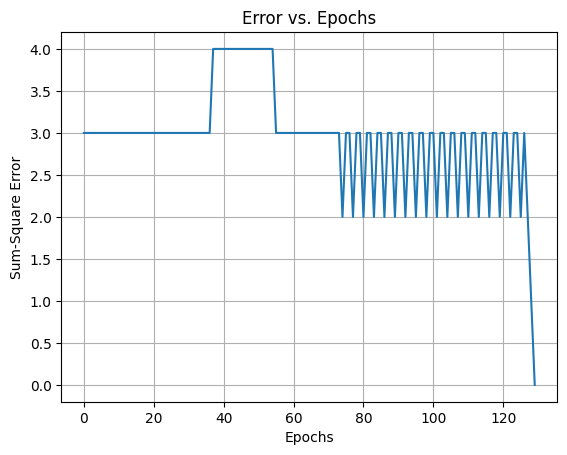

In [ ]:
# QUESTION A2
import numpy as np
import matplotlib.pyplot as plt
# Function to calculate the weighted sum
def calculate_weighted_sum(input_vector, weights):
    return input_vector[0] * weights["W0"] + input_vector[1] * weights["W1"] + input_vector[2] * weights["W2"]
# Step activation function
def step_activation_function(weighted_sum):
    if weighted_sum >= 0:
      return 1
    else:
      return 0
# Perceptron training function
def train_perceptron(inputs, outputs, weights, alpha, max_iterations, convergence_threshold):
    epoch = 0
    errorlist = []
    while epoch < max_iterations:
        total_error = 0
        for i in range(len(inputs)):
            # Calculate the weighted sum
            weighted_sum = calculate_weighted_sum(inputs[i], weights)
            # Apply the activation function
            predicted_output = step_activation_function(weighted_sum)
            # Calculate the error
            error = outputs[i] - predicted_output
            total_error += error**2
            # Update the weights
            weights["W0"] += alpha * error * inputs[i][0]
            weights["W1"] += alpha * error * inputs[i][1]
            weights["W2"] += alpha * error * inputs[i][2]
        # total error for this epoch is stored
        errorlist.append(total_error)
        # Checking whether error is below the convergence threshold
        if total_error <= convergence_threshold:
            break
        epoch += 1
    return weights, epoch, errorlist
def plot(errors):
    # Plotting Error vs Epochs
    plt.plot(range(len(errors)), errors)
    plt.title('Error vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Sum-Square Error')
    plt.grid(True)
    plt.show()
# Initial weights
weights = {"W0": 10, "W1": 0.2, "W2": -0.75}
# Learning rate
alpha = 0.05
# Threshold for convergence
convergence_threshold = 0.002
# Maximum number of iterations
max_iterations = 1000
# AND gate input-output pairs with bias term as first input
inputs = np.array([[1, 0, 0], [1, 0, 1],[1, 1, 0],[1, 1, 1]])
# AND gate output
outputs = np.array([0, 0, 0, 1])
# Training the perceptron
final_weights, num_epochs, errors = train_perceptron(inputs, outputs, weights, alpha, max_iterations, convergence_threshold)
print(f"FINAL WEIGHTS: {final_weights}")
print()
print(f"No. of EPOCHS TO CONVERGE: {num_epochs}")
print()
plot(errors)


In [ ]:
### A3 QUESTION
import math
import random

def summation_unit(inputs, weights):
    return sum(x * w for x, w in zip(inputs, weights))

def bipolar_step_function(weighted_sum, threshold=0):
    return 1 if weighted_sum >= threshold else -1

def sigmoid_function(weighted_sum):
    return 1 / (1 + math.exp(-weighted_sum))

def relu_function(weighted_sum):
    return max(0, weighted_sum)

def error_calculation(predicted, actual):
    return actual - predicted

def train_perceptron(activation_function, learning_rate, max_epochs):
    weights = [random.uniform(-1, 1), random.uniform(-1, 1)]
    bias = random.uniform(-1, 1)
    inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
    actual_outputs = [-1, -1, -1, 1]  # AND gate for bipolar step, adjusted for other functions

    total_iterations = 0
    for epoch in range(max_epochs):
        total_error = 0
        epoch_iterations = 0
        for idx, (input1, input2) in enumerate(inputs):
            input_values = [input1, input2]
            weighted_sum = summation_unit(input_values, weights) + bias
            predicted_output = activation_function(weighted_sum)

            error = error_calculation(predicted_output, actual_outputs[idx])
            total_error += abs(error)

            # Update weights and bias
            for i in range(len(weights)):
                weights[i] += learning_rate * error * input_values[i]
            bias += learning_rate * error

            epoch_iterations += 1

        total_iterations += epoch_iterations
        if total_error == 0:
            print(f"Converged after {epoch + 1} epochs and {total_iterations} iterations")
            return epoch + 1, total_iterations

    print(f"Did not converge within {max_epochs} epochs and {total_iterations} iterations")
    return max_epochs, total_iterations

def main():
    learning_rate = 0.1
    max_epochs = 1000

    print("Bipolar Step Function:")
    bipolar_epochs, bipolar_iterations = train_perceptron(bipolar_step_function, learning_rate, max_epochs)

    print("\nSigmoid Function:")
    sigmoid_epochs, sigmoid_iterations = train_perceptron(sigmoid_function, learning_rate, max_epochs)

    print("\nReLU Function:")
    relu_epochs, relu_iterations = train_perceptron(relu_function, learning_rate, max_epochs)

    print("\nComparison:")
    print(f"Bipolar Step Function: {bipolar_epochs} epochs, {bipolar_iterations} iterations")
    print(f"Sigmoid Function: {sigmoid_epochs} epochs, {sigmoid_iterations} iterations")
    print(f"ReLU Function: {relu_epochs} epochs, {relu_iterations} iterations")

if __name__ == "__main__":
    main()

Bipolar Step Function:
Converged after 6 epochs and 24 iterations

Sigmoid Function:
Did not converge within 1000 epochs and 4000 iterations

ReLU Function:
Did not converge within 1000 epochs and 4000 iterations

Comparison:
Bipolar Step Function: 6 epochs, 24 iterations
Sigmoid Function: 1000 epochs, 4000 iterations
ReLU Function: 1000 epochs, 4000 iterations


Learning rate: 0.1, Iterations to converge: 2
Learning rate: 0.2, Iterations to converge: 2
Learning rate: 0.3, Iterations to converge: 3
Learning rate: 0.4, Iterations to converge: 3
Learning rate: 0.5, Iterations to converge: 3
Learning rate: 0.6, Iterations to converge: 6
Learning rate: 0.7, Iterations to converge: 6
Learning rate: 0.8, Iterations to converge: 6
Learning rate: 0.9, Iterations to converge: 6
Learning rate: 1.0, Iterations to converge: 6


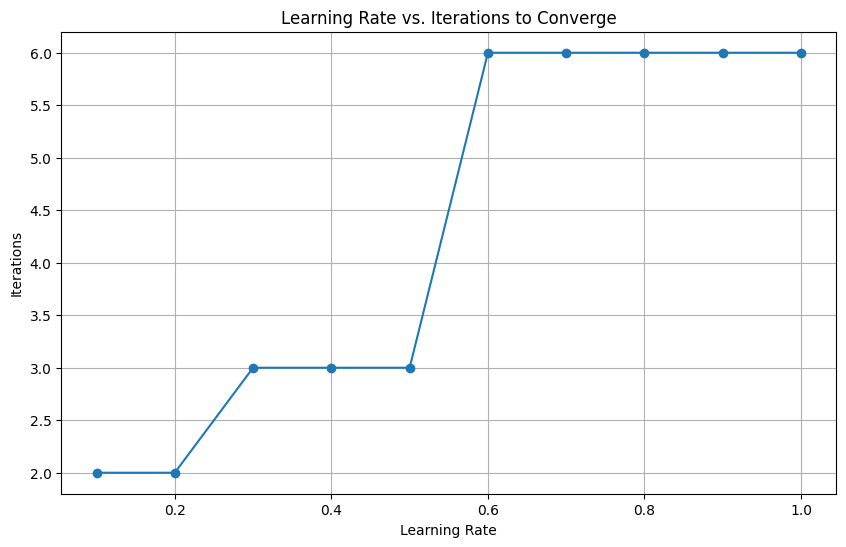

In [ ]:
###### A4 QUESTION
import math
import random
import matplotlib.pyplot as plt

def summation_unit(inputs, weights):
    return sum(x * w for x, w in zip(inputs, weights))

def step_function(weighted_sum, threshold=0):
    return 1 if weighted_sum >= threshold else 0

def error_calculation(predicted, actual):
    return actual - predicted

def train_perceptron(learning_rate, max_epochs):
    weights = [0.73, 0.5]  # Initial weights as in A1
    bias = -0.7  # Initial bias as in A1
    inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
    actual_outputs = [0, 0, 0, 1]  # AND gate

    for epoch in range(max_epochs):
        total_error = 0
        for idx, (input1, input2) in enumerate(inputs):
            input_values = [input1, input2]
            weighted_sum = summation_unit(input_values, weights) + bias
            predicted_output = step_function(weighted_sum)

            error = error_calculation(predicted_output, actual_outputs[idx])
            total_error += abs(error)

            # Update weights and bias
            for i in range(len(weights)):
                weights[i] += learning_rate * error * input_values[i]
            bias += learning_rate * error

        if total_error == 0:
            return epoch + 1

    return max_epochs

def main():
    learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    max_epochs = 1000
    iterations = []

    for lr in learning_rates:
        epochs = train_perceptron(lr, max_epochs)
        iterations.append(epochs)
        print(f"Learning rate: {lr}, Iterations to converge: {epochs}")

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(learning_rates, iterations, marker='o')
    plt.title('Learning Rate vs. Iterations to Converge')
    plt.xlabel('Learning Rate')
    plt.ylabel('Iterations')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()

A1: XOR Gate Experiment

Inputs: [0 0], Weighted Sum: -0.7
Step Function Output: 0
Bipolar Step Function Output: -1
Sigmoid Function Output: 0.3318122278318339
TanH Function Output: -0.6043677771171634
ReLU Function Output: 0.0
Leaky ReLU Function Output: -0.006999999999999999
Actual Output: 0, Error: 0

Inputs: [0 1], Weighted Sum: -0.19999999999999996
Step Function Output: 0
Bipolar Step Function Output: -1
Sigmoid Function Output: 0.45016600268752216
TanH Function Output: -0.19737532022490395
ReLU Function Output: 0.0
Leaky ReLU Function Output: -0.0019999999999999996
Actual Output: 1, Error: 1

Inputs: [1 0], Weighted Sum: -0.19999999999999996
Step Function Output: 0
Bipolar Step Function Output: -1
Sigmoid Function Output: 0.45016600268752216
TanH Function Output: -0.19737532022490395
ReLU Function Output: 0.0
Leaky ReLU Function Output: -0.0019999999999999996
Actual Output: 1, Error: 1

Inputs: [1 1], Weighted Sum: 0.30000000000000004
Step Function Output: 1
Bipolar Step Function

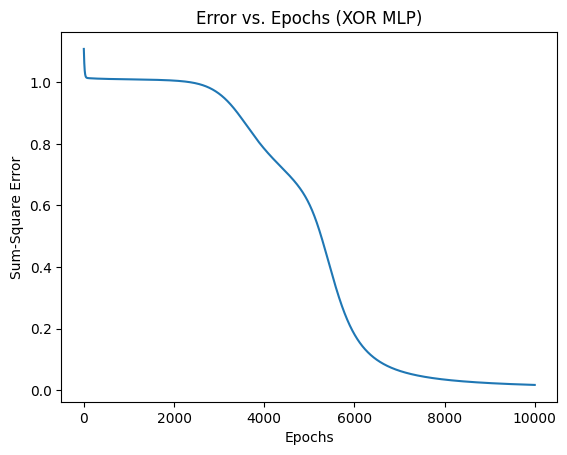


A3: XOR Gate Activation Function Comparison
Bipolar Step Function: 10000 epochs
Sigmoid Function: 10000 epochs
ReLU Function: 10000 epochs


In [ ]:
### A5 QUESTION

import math
import random
import numpy as np
import matplotlib.pyplot as plt

# A1: Activation functions and basic perceptron for XOR gate

def summation_unit(inputs, weights):
    return np.dot(inputs, weights)

def step_function(weighted_sum, threshold=0):
    return np.where(weighted_sum >= threshold, 1, 0)

def bipolar_step_function(weighted_sum, threshold=0):
    return np.where(weighted_sum >= threshold, 1, -1)

def sigmoid_function(weighted_sum):
    return 1 / (1 + np.exp(-weighted_sum))

def tanh_function(weighted_sum):
    return np.tanh(weighted_sum)

def relu_function(weighted_sum):
    return np.maximum(0, weighted_sum)

def leaky_relu_function(weighted_sum, alpha=0.01):
    return np.where(weighted_sum > 0, weighted_sum, alpha * weighted_sum)

def error_calculation(predicted, actual):
    return actual - predicted

def a1_xor_experiment():
    weights = np.array([0.5, 0.5])
    bias = -0.7
    inputs = np.array([(0, 0), (0, 1), (1, 0), (1, 1)])
    actual_outputs = np.array([0, 1, 1, 0])  # XOR gate outputs

    print("A1: XOR Gate Experiment")
    for idx, input_values in enumerate(inputs):
        weighted_sum = summation_unit(input_values, weights) + bias
        print(f"\nInputs: {input_values}, Weighted Sum: {weighted_sum}")
        print(f"Step Function Output: {step_function(weighted_sum)}")
        print(f"Bipolar Step Function Output: {bipolar_step_function(weighted_sum)}")
        print(f"Sigmoid Function Output: {sigmoid_function(weighted_sum)}")
        print(f"TanH Function Output: {tanh_function(weighted_sum)}")
        print(f"ReLU Function Output: {relu_function(weighted_sum)}")
        print(f"Leaky ReLU Function Output: {leaky_relu_function(weighted_sum)}")
        actual_output = actual_outputs[idx]
        error = error_calculation(step_function(weighted_sum), actual_output)
        print(f"Actual Output: {actual_output}, Error: {error}")

# A2: Multi-layer perceptron for XOR gate

def forward_propagation(inputs, weights1, weights2, bias1, bias2):
    hidden_layer = sigmoid_function(np.dot(inputs, weights1) + bias1)
    output = sigmoid_function(np.dot(hidden_layer, weights2) + bias2)
    return hidden_layer, output

def backward_propagation(inputs, hidden_layer, output, target, weights1, weights2):
    output_error = target - output
    output_delta = output_error * output * (1 - output)

    hidden_error = np.dot(output_delta, weights2.T)
    hidden_delta = hidden_error * hidden_layer * (1 - hidden_layer)

    weights2_update = np.dot(hidden_layer.T, output_delta)
    weights1_update = np.dot(inputs.T, hidden_delta)

    return weights1_update, weights2_update, output_delta, hidden_delta

def train_xor_mlp(inputs, targets, hidden_size, learning_rate, max_epochs):
    input_size = inputs.shape[1]
    output_size = 1

    weights1 = np.random.randn(input_size, hidden_size)
    weights2 = np.random.randn(hidden_size, output_size)
    bias1 = np.zeros((1, hidden_size))
    bias2 = np.zeros((1, output_size))

    errors = []

    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(inputs)):
            hidden_layer, output = forward_propagation(inputs[i:i+1], weights1, weights2, bias1, bias2)
            weights1_update, weights2_update, output_delta, hidden_delta = backward_propagation(
                inputs[i:i+1], hidden_layer, output, targets[i], weights1, weights2)

            weights1 += learning_rate * weights1_update
            weights2 += learning_rate * weights2_update
            bias1 += learning_rate * hidden_delta
            bias2 += learning_rate * output_delta

            total_error += np.sum((targets[i] - output) ** 2)

        errors.append(total_error)
        if total_error < 0.001:
            break

    return weights1, weights2, bias1, bias2, errors

def a2_xor_experiment():
    inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    targets = np.array([[0], [1], [1], [0]])

    hidden_size = 2
    learning_rate = 0.1
    max_epochs = 10000

    weights1, weights2, bias1, bias2, errors = train_xor_mlp(inputs, targets, hidden_size, learning_rate, max_epochs)

    print("\nA2: XOR Gate MLP Experiment")
    print(f"Final weights1:\n{weights1}")
    print(f"Final weights2:\n{weights2}")
    print(f"Final bias1:\n{bias1}")
    print(f"Final bias2:\n{bias2}")
    print(f"Number of epochs: {len(errors)}")

    plt.plot(errors)
    plt.title('Error vs. Epochs (XOR MLP)')
    plt.xlabel('Epochs')
    plt.ylabel('Sum-Square Error')
    plt.show()

# A3: Comparing activation functions for XOR gate

def train_xor_perceptron(activation_function, learning_rate, max_epochs):
    weights1 = np.random.randn(2, 2)
    weights2 = np.random.randn(2, 1)
    bias1 = np.zeros((1, 2))
    bias2 = np.zeros((1, 1))

    inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    targets = np.array([[0], [1], [1], [0]])

    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(inputs)):
            hidden_layer = activation_function(np.dot(inputs[i:i+1], weights1) + bias1)
            output = activation_function(np.dot(hidden_layer, weights2) + bias2)

            error = targets[i] - output
            total_error += np.sum(error ** 2)

            output_delta = error * output * (1 - output) if activation_function == sigmoid_function else error
            hidden_error = np.dot(output_delta, weights2.T)
            hidden_delta = hidden_error * hidden_layer * (1 - hidden_layer) if activation_function == sigmoid_function else hidden_error

            weights2 += learning_rate * np.dot(hidden_layer.T, output_delta)
            weights1 += learning_rate * np.dot(inputs[i:i+1].T, hidden_delta)
            bias2 += learning_rate * output_delta
            bias1 += learning_rate * hidden_delta

        if total_error < 0.001:
            return epoch + 1

    return max_epochs

def a3_xor_experiment():
    learning_rate = 0.1
    max_epochs = 10000

    print("\nA3: XOR Gate Activation Function Comparison")

    bipolar_epochs = train_xor_perceptron(bipolar_step_function, learning_rate, max_epochs)
    print(f"Bipolar Step Function: {bipolar_epochs} epochs")

    sigmoid_epochs = train_xor_perceptron(sigmoid_function, learning_rate, max_epochs)
    print(f"Sigmoid Function: {sigmoid_epochs} epochs")

    relu_epochs = train_xor_perceptron(relu_function, learning_rate, max_epochs)
    print(f"ReLU Function: {relu_epochs} epochs")

if __name__ == "__main__":
    a1_xor_experiment()
    a2_xor_experiment()
    a3_xor_experiment()

In [ ]:
'''
Use customer data provided below. Build a perceptron and learn to
classify the transactions as high or low value as provided in the
below table. Use sigmoid as the activation function. Initialise the
weights and learning rate with your choice.
'''
#QUESTION A6
import numpy as np

# Sample Data
data = np.array([
    [20, 6, 2, 386, 1],
    [16, 3, 6, 289, 1],
    [27, 6, 2, 393, 1],
    [19, 1, 2, 110, 0],
    [24, 4, 2, 280, 1],
    [22, 1, 5, 167, 0],
    [15, 4, 2, 271, 1],
    [18, 4, 2, 274, 1],
    [21, 1, 4, 148, 0],
    [16, 2, 4, 198, 0]
])

# Separate features and labels
X = data[:, :-1]
y = data[:, -1]

# Normalize the input features
X = X / X.max(axis=0)

# Initialize weights and bias
weights = np.random.randn(X.shape[1])
bias = np.random.randn()
learning_rate = 0.1
epochs = 10000

# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Training the perceptron
for epoch in range(epochs):
    for i in range(len(X)):
        # Calculate weighted sum
        z = np.dot(X[i], weights) + bias
        # Apply sigmoid activation
        output = sigmoid(z)
        # Calculate error
        error = y[i] - output
        # Update weights and bias
        weights += learning_rate * error * X[i]
        bias += learning_rate * error

# Final weights and bias
print("Weights:", weights)
print("Bias:", bias)

# Prediction function
def predict(features):
    z = np.dot(features, weights) + bias
    return sigmoid(z)

# Test predictions
for i in range(len(X)):
    prediction = predict(X[i])
    print(f"Transaction {i+1}: Predicted = {prediction:.2f}, Actual = {y[i]}")

Weights: [-6.01927167 21.35025355  0.21295544 15.94535348]
Bias: -15.130749237042146
Transaction 1: Predicted = 1.00, Actual = 1
Transaction 2: Predicted = 0.98, Actual = 1
Transaction 3: Predicted = 1.00, Actual = 1
Transaction 4: Predicted = 0.00, Actual = 0
Transaction 5: Predicted = 0.99, Actual = 1
Transaction 6: Predicted = 0.00, Actual = 0
Transaction 7: Predicted = 1.00, Actual = 1
Transaction 8: Predicted = 1.00, Actual = 1
Transaction 9: Predicted = 0.00, Actual = 0
Transaction 10: Predicted = 0.03, Actual = 0


In [ ]:
import numpy as np
#QUESTION A7
# Sample Data
data = np.array([
    [20, 6, 2, 386, 1],
    [16, 3, 6, 289, 1],
    [27, 6, 2, 393, 1],
    [19, 1, 2, 110, 0],
    [24, 4, 2, 280, 1],
    [22, 1, 5, 167, 0],
    [15, 4, 2, 271, 1],
    [18, 4, 2, 274, 1],
    [21, 1, 4, 148, 0],
    [16, 2, 4, 198, 0]
])

# Separate features and labels
X = data[:, :-1]
y = data[:, -1]

# Normalize the input features
X = X / X.max(axis=0)

# Adding a column of ones to include bias in the matrix operation
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Calculate pseudoinverse of X_b
X_b_pinv = np.linalg.pinv(X_b)

# Calculate weights using pseudoinverse
weights_pinv = np.dot(X_b_pinv, y)

# Extract bias and weights separately
bias_pinv = weights_pinv[0]
weights_pinv = weights_pinv[1:]

print("Pseudoinverse Weights:", weights_pinv)
print("Pseudoinverse Bias:", bias_pinv)

# Prediction function using pseudoinverse weights
def predict_pinv(features):
    z = np.dot(features, weights_pinv) + bias_pinv
    return sigmoid(z)

# Test predictions using pseudoinverse
for i in range(len(X)):
    prediction = predict_pinv(X[i])
    print(f"Transaction {i+1}: Predicted (Pseudoinverse) = {prediction:.2f}, Actual = {y[i]}")

Pseudoinverse Weights: [-0.68376335  0.93806344  0.01866877  0.7458411 ]
Pseudoinverse Bias: 0.1139902978415041
Transaction 1: Predicted (Pseudoinverse) = 0.78, Actual = 1
Transaction 2: Predicted (Pseudoinverse) = 0.68, Actual = 1
Transaction 3: Predicted (Pseudoinverse) = 0.75, Actual = 1
Transaction 4: Predicted (Pseudoinverse) = 0.50, Actual = 0
Transaction 5: Predicted (Pseudoinverse) = 0.66, Actual = 1
Transaction 6: Predicted (Pseudoinverse) = 0.51, Actual = 0
Transaction 7: Predicted (Pseudoinverse) = 0.71, Actual = 1
Transaction 8: Predicted (Pseudoinverse) = 0.69, Actual = 1
Transaction 9: Predicted (Pseudoinverse) = 0.51, Actual = 0
Transaction 10: Predicted (Pseudoinverse) = 0.60, Actual = 0


In [ ]:
#QUESTION A8
import numpy as np


# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    return x * (1 - x)


# AND gate input and output
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([[0], [0], [0], [1]])

# Initialize weights randomly with mean 0
v = np.random.uniform(-1, 1, (2, 2))  # Weights between input and hidden layer
w = np.random.uniform(-1, 1, (2, 1))  # Weights between hidden layer and output layer

# Learning rate and number of iterations
alpha = 0.05
iterations = 1000
convergence_error = 0.002

for i in range(iterations):
    # Forward pass
    hidden_input = np.dot(inputs, v)  # Hidden layer input
    hidden_output = sigmoid(hidden_input)  # Hidden layer output

    final_input = np.dot(hidden_output, w)  # Output layer input
    predicted_output = sigmoid(final_input)  # Output layer output

    # Calculate the error
    error = outputs - predicted_output

    if np.mean(np.abs(error)) <= convergence_error:
        print(f"Converged after {i + 1} iterations.")
        break

    # Backpropagation
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    error_hidden_layer = d_predicted_output.dot(w.T)
    d_hidden_output = error_hidden_layer * sigmoid_derivative(hidden_output)

    # Update weights
    w += hidden_output.T.dot(d_predicted_output) * alpha
    v += inputs.T.dot(d_hidden_output) * alpha

# Final results
print("Weights between input and hidden layer:\n", v)
print("Weights between hidden and output layer:\n", w)
print("Predicted Output:\n", predicted_output)

Weights between input and hidden layer:
 [[-0.65043023 -1.04846896]
 [-1.50227542 -0.71646182]]
Weights between hidden and output layer:
 [[-2.08653317]
 [-1.65028076]]
Predicted Output:
 [[0.13382863]
 [0.28467659]
 [0.24165472]
 [0.38731808]]


In [ ]:
#QUESTION A9
import math
def summation_unit(inputs, weights):
    #Calculates the weighted sum of inputs.
    return sum(x * w for x, w in zip(inputs, weights))

def step_function(weighted_sum, threshold=0):
    #Step activation function
    return 1 if weighted_sum >= threshold else 0

def bipolar_step_function(weighted_sum, threshold=0):
    #Bipolar step activation function.
    return 1 if weighted_sum >= threshold else -1

def sigmoid_function(weighted_sum):
    #Sigmoid activation function.
    return 1 / (1 + math.exp(-weighted_sum))

def tanh_function(weighted_sum):
    #TanH activation function.
    return math.tanh(weighted_sum)

def relu_function(weighted_sum):
    #ReLU activation function.
    return max(0, weighted_sum)

def leaky_relu_function(weighted_sum, alpha=0.01):
    #Leaky ReLU activation function.
    return weighted_sum if weighted_sum > 0 else alpha * weighted_sum
def error_calculation(predicted, actual):
    #Calculates the error between predicted and actual values
    return actual - predicted
def main():
    weights = [0.5, 0.5]  # Example weights
    bias = -0.7  # Example bias to achieve AND gate behavior
    inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]  # Test cases for XOR gate
    actual_outputs = [0, 1, 1, 0]  # Expected outputs for XOR gate

    for idx, (input1, input2) in enumerate(inputs):
        input_values = [input1, input2]

        # Summation Unit
        weighted_sum = summation_unit(input_values, weights) + bias
        print(f"Inputs: {input_values}, Weighted Sum: {weighted_sum}")

        # Activation Functions
        step_output = step_function(weighted_sum)
        print(f"Step Function Output: {step_output}")

        bipolar_step_output = bipolar_step_function(weighted_sum)
        print(f"Bipolar Step Function Output: {bipolar_step_output}")

        sigmoid_output = sigmoid_function(weighted_sum)
        print(f"Sigmoid Function Output: {sigmoid_output}")

        tanh_output = tanh_function(weighted_sum)
        print(f"TanH Function Output: {tanh_output}")

        relu_output = relu_function(weighted_sum)
        print(f"ReLU Function Output: {relu_output}")

        leaky_relu_output = leaky_relu_function(weighted_sum)
        print(f"Leaky ReLU Function Output: {leaky_relu_output}")

        # Error Calculation
        actual_output = actual_outputs[idx]
        error = error_calculation(step_output, actual_output)
        print(f"Actual Output: {actual_output}, Error: {error}\n")

if __name__ == "__main__":
    main()



Inputs: [0, 0], Weighted Sum: -0.7
Step Function Output: 0
Bipolar Step Function Output: -1
Sigmoid Function Output: 0.3318122278318339
TanH Function Output: -0.6043677771171636
ReLU Function Output: 0
Leaky ReLU Function Output: -0.006999999999999999
Actual Output: 0, Error: 0

Inputs: [0, 1], Weighted Sum: -0.19999999999999996
Step Function Output: 0
Bipolar Step Function Output: -1
Sigmoid Function Output: 0.45016600268752216
TanH Function Output: -0.19737532022490398
ReLU Function Output: 0
Leaky ReLU Function Output: -0.0019999999999999996
Actual Output: 1, Error: 1

Inputs: [1, 0], Weighted Sum: -0.19999999999999996
Step Function Output: 0
Bipolar Step Function Output: -1
Sigmoid Function Output: 0.45016600268752216
TanH Function Output: -0.19737532022490398
ReLU Function Output: 0
Leaky ReLU Function Output: -0.0019999999999999996
Actual Output: 1, Error: 1

Inputs: [1, 1], Weighted Sum: 0.30000000000000004
Step Function Output: 1
Bipolar Step Function Output: 1
Sigmoid Function

In [ ]:
#QUESTION A10
import math

# Summation Unit
def summation_unit(inputs, weights):
    return sum(x * w for x, w in zip(inputs, weights))

# Activation Functions
def step_function(weighted_sum, threshold=0):
    return 1 if weighted_sum >= threshold else 0

def bipolar_step_function(weighted_sum, threshold=0):
    return 1 if weighted_sum >= threshold else -1

def sigmoid_function(weighted_sum):
    return 1 / (1 + math.exp(-weighted_sum))

def tanh_function(weighted_sum):
    return math.tanh(weighted_sum)

def relu_function(weighted_sum):
    return max(0, weighted_sum)

def leaky_relu_function(weighted_sum, alpha=0.01):
    return weighted_sum if weighted_sum > 0 else alpha * weighted_sum

# Error Calculation
def error_calculation(predicted, actual):
    return actual - predicted

# Mapping Logic Gate Output to 2 Output Nodes
def map_output_to_nodes(logic_gate_output):
    if logic_gate_output == 0:
        return [1, 0]  # [O1, O2]
    else:
        return [0, 1]  # [O1, O2]

# Main Function
def main():
    weights = [0.5, 0.5]  # Example weights
    bias = -0.7  # Example bias to achieve AND gate behavior
    inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]  # Test cases for AND gate
    actual_outputs = [0, 0, 0, 1]  # Expected outputs for AND gate

    for idx, (input1, input2) in enumerate(inputs):
        input_values = [input1, input2]

        # Summation Unit
        weighted_sum = summation_unit(input_values, weights) + bias
        print(f"Inputs: {input_values}, Weighted Sum: {weighted_sum}")

        # Activation Functions
        step_output = map_output_to_nodes(step_function(weighted_sum))
        print(f"Step Function Output: {step_output}")

        bipolar_step_output = map_output_to_nodes(bipolar_step_function(weighted_sum))
        print(f"Bipolar Step Function Output: {bipolar_step_output}")

        sigmoid_output = map_output_to_nodes(sigmoid_function(weighted_sum))
        print(f"Sigmoid Function Output: {sigmoid_output}")

        tanh_output = map_output_to_nodes(tanh_function(weighted_sum))
        print(f"TanH Function Output: {tanh_output}")

        relu_output = map_output_to_nodes(relu_function(weighted_sum))
        print(f"ReLU Function Output: {relu_output}")

        leaky_relu_output = map_output_to_nodes(leaky_relu_function(weighted_sum))
        print(f"Leaky ReLU Function Output: {leaky_relu_output}")

        # Error Calculation
        actual_output = map_output_to_nodes(actual_outputs[idx])
        error = [error_calculation(step_output[i], actual_output[i]) for i in range(2)]
        print(f"Actual Output: {actual_output}, Error: {error}\n")

if __name__ == "__main__":
    main()


Inputs: [0, 0], Weighted Sum: -0.7
Step Function Output: [1, 0]
Bipolar Step Function Output: [0, 1]
Sigmoid Function Output: [0, 1]
TanH Function Output: [0, 1]
ReLU Function Output: [1, 0]
Leaky ReLU Function Output: [0, 1]
Actual Output: [1, 0], Error: [0, 0]

Inputs: [0, 1], Weighted Sum: -0.19999999999999996
Step Function Output: [1, 0]
Bipolar Step Function Output: [0, 1]
Sigmoid Function Output: [0, 1]
TanH Function Output: [0, 1]
ReLU Function Output: [1, 0]
Leaky ReLU Function Output: [0, 1]
Actual Output: [1, 0], Error: [0, 0]

Inputs: [1, 0], Weighted Sum: -0.19999999999999996
Step Function Output: [1, 0]
Bipolar Step Function Output: [0, 1]
Sigmoid Function Output: [0, 1]
TanH Function Output: [0, 1]
ReLU Function Output: [1, 0]
Leaky ReLU Function Output: [0, 1]
Actual Output: [1, 0], Error: [0, 0]

Inputs: [1, 1], Weighted Sum: 0.30000000000000004
Step Function Output: [0, 1]
Bipolar Step Function Output: [0, 1]
Sigmoid Function Output: [0, 1]
TanH Function Output: [0, 1]

FINAL WEIGHTS for O1: {'W0': 6.8499999999999766, 'W1': -2.9499999999999975, 'W2': -3.899999999999994}
FINAL WEIGHTS for O2: {'W0': -0.10000000000000765, 'W1': 0.1000000000000001, 'W2': 0.05000000000000032}

No. of EPOCHS TO CONVERGE: 129



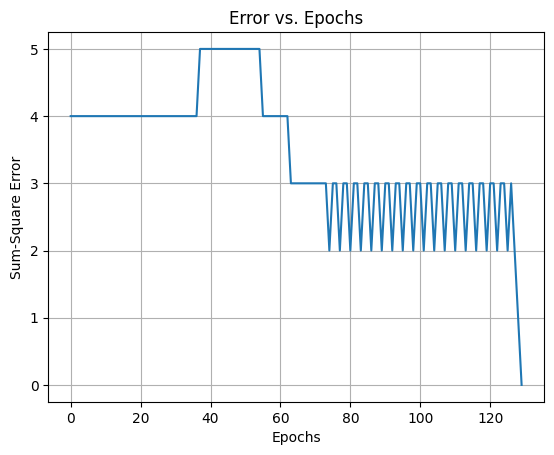

In [ ]:
#QUESTION A10
import numpy as np
import matplotlib.pyplot as plt

def calculate_weighted_sum(input_vector, weights):
    return input_vector[0] * weights["W0"] + input_vector[1] * weights["W1"] + input_vector[2] * weights["W2"]

def step_activation_function(weighted_sum):
    return 1 if weighted_sum >= 0 else 0

def train_perceptron(inputs, outputs, weights_O1, weights_O2, alpha, max_iterations, convergence_threshold):
    epoch = 0
    errorlist = []
    while epoch < max_iterations:
        total_error = 0
        for i in range(len(inputs)):
            # Calculate the weighted sum for O1 and O2
            weighted_sum_O1 = calculate_weighted_sum(inputs[i], weights_O1)
            weighted_sum_O2 = calculate_weighted_sum(inputs[i], weights_O2)

            # Apply the activation function
            predicted_output_O1 = step_activation_function(weighted_sum_O1)
            predicted_output_O2 = step_activation_function(weighted_sum_O2)

            # Calculate the error for O1 and O2
            error_O1 = outputs[i][0] - predicted_output_O1
            error_O2 = outputs[i][1] - predicted_output_O2
            total_error += error_O1**2 + error_O2**2

            # Update the weights for O1
            weights_O1["W0"] += alpha * error_O1 * inputs[i][0]
            weights_O1["W1"] += alpha * error_O1 * inputs[i][1]
            weights_O1["W2"] += alpha * error_O1 * inputs[i][2]

            # Update the weights for O2
            weights_O2["W0"] += alpha * error_O2 * inputs[i][0]
            weights_O2["W1"] += alpha * error_O2 * inputs[i][1]
            weights_O2["W2"] += alpha * error_O2 * inputs[i][2]

        # Total error for this epoch is stored
        errorlist.append(total_error)

        # Checking whether error is below the convergence threshold
        if total_error <= convergence_threshold:
            break
        epoch += 1

    return weights_O1, weights_O2, epoch, errorlist

def plot(errors):
    plt.plot(range(len(errors)), errors)
    plt.title('Error vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Sum-Square Error')
    plt.grid(True)
    plt.show()

# Initial weights
weights_O1 = {"W0": 10, "W1": 0.2, "W2": -0.75}
weights_O2 = {"W0": 10, "W1": 0.2, "W2": -0.75}

# Learning rate
alpha = 0.05
# Threshold for convergence
convergence_threshold = 0.002
# Maximum number of iterations
max_iterations = 1000

# AND gate input-output pairs with bias term as first input
inputs = np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
# AND gate output mapping to two output nodes
outputs = np.array([[1, 0], [1, 0], [1, 0], [0, 1]])

# Training the perceptron
final_weights_O1, final_weights_O2, num_epochs, errors = train_perceptron(inputs, outputs, weights_O1, weights_O2, alpha, max_iterations, convergence_threshold)

print(f"FINAL WEIGHTS for O1: {final_weights_O1}")
print(f"FINAL WEIGHTS for O2: {final_weights_O2}")
print()
print(f"No. of EPOCHS TO CONVERGE: {num_epochs}")
print()
plot(errors)


In [ ]:
#QUESTION A11
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# AND Gate Inputs and Outputs
and_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
and_outputs = np.array([0, 0, 0, 1])

# XOR Gate Inputs and Outputs
xor_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
xor_outputs = np.array([0, 1, 1, 0])

# Scaling the inputs
scaler = StandardScaler()
scaled_and_inputs = scaler.fit_transform(and_inputs)
scaled_xor_inputs = scaler.fit_transform(xor_inputs)

# Function to train and evaluate an MLP for a given gate
def train_and_evaluate_mlp(inputs, outputs, hidden_layer_sizes):
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation='relu', max_iter=2000, random_state=42, learning_rate_init=0.01)
    mlp.fit(inputs, outputs)
    predictions = mlp.predict(inputs)
    accuracy = accuracy_score(outputs, predictions)
    return predictions, accuracy

# Train and evaluate MLP for AND Gate (No hidden layers)
and_predictions, and_accuracy = train_and_evaluate_mlp(scaled_and_inputs, and_outputs, hidden_layer_sizes=())
print(f"AND Gate Predictions: {and_predictions}")
print(f"AND Gate Accuracy: {and_accuracy * 100:.2f}%\n")

# Train and evaluate MLP for XOR Gate (One hidden layer with 2 neurons)
xor_predictions, xor_accuracy = train_and_evaluate_mlp(scaled_xor_inputs, xor_outputs, hidden_layer_sizes=(2,))
print(f"XOR Gate Predictions: {xor_predictions}")
print(f"XOR Gate Accuracy: {xor_accuracy * 100:.2f}%")


AND Gate Predictions: [0 0 0 1]
AND Gate Accuracy: 100.00%

XOR Gate Predictions: [1 1 1 1]
XOR Gate Accuracy: 50.00%


In [ ]:
#QUESTION A12
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
from google.colab import drive
drive.mount('/content/drive')
sentence_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/MLLAB3.xlsx') # Update this with the path to your Excel file

# Step 2: Preprocess the Data
# TF-IDF Vectorization for Text
tfidf_vectorizer = TfidfVectorizer()
text_features = tfidf_vectorizer.fit_transform(sentence_data['Text'])

# Select and scale the other numerical features
numerical_features = sentence_data[['No_of_words', 'No_of_questoning_words', 'Has_Question_Mark']]
scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(numerical_features)

# Combine TF-IDF features with other numerical features
X = hstack([text_features, scaled_numerical_features])
y = sentence_data['label']

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(), activation='relu', max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Step 5: Evaluate the Model
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Output Results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Accuracy: 97.75%
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        90
           1       0.98      0.98      0.98        88

    accuracy                           0.98       178
   macro avg       0.98      0.98      0.98       178
weighted avg       0.98      0.98      0.98       178

